In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
file_paths = {
    'ppo_train_energy': 'results/ppo-train-energy_rewards.csv',
    'ppo_train_regular': 'results/ppo-train-rewards.csv',
    'ppo_eval_energy': 'results/ppo-eval-energy_rewards.csv',
    'ppo_eval_regular': 'results/ppo-eval-rewards.csv',
    'trpo_train_energy': 'results/trpo-train-energy_rewards.csv',
    'trpo_train_regular': 'results/trpo-train-rewards.csv',
    'trpo_eval_energy': 'results/trpo-eval-energy_rewards.csv',
    'trpo_eval_regular': 'results/trpo-eval-rewards.csv',
    'random': 'results/random.csv'
}

dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [4]:
metrics = ['reward', 'energy', 'length']
titles = ['Regular Reward', 'Energy Reward', 'Episode Length']

In [6]:
colors = {'regular': 'tab:blue', 'energy': 'tab:orange', 'random': 'tab:green'}

def smooth(data, window=10):
    return np.convolve(data, np.ones(window)/window, mode='valid')

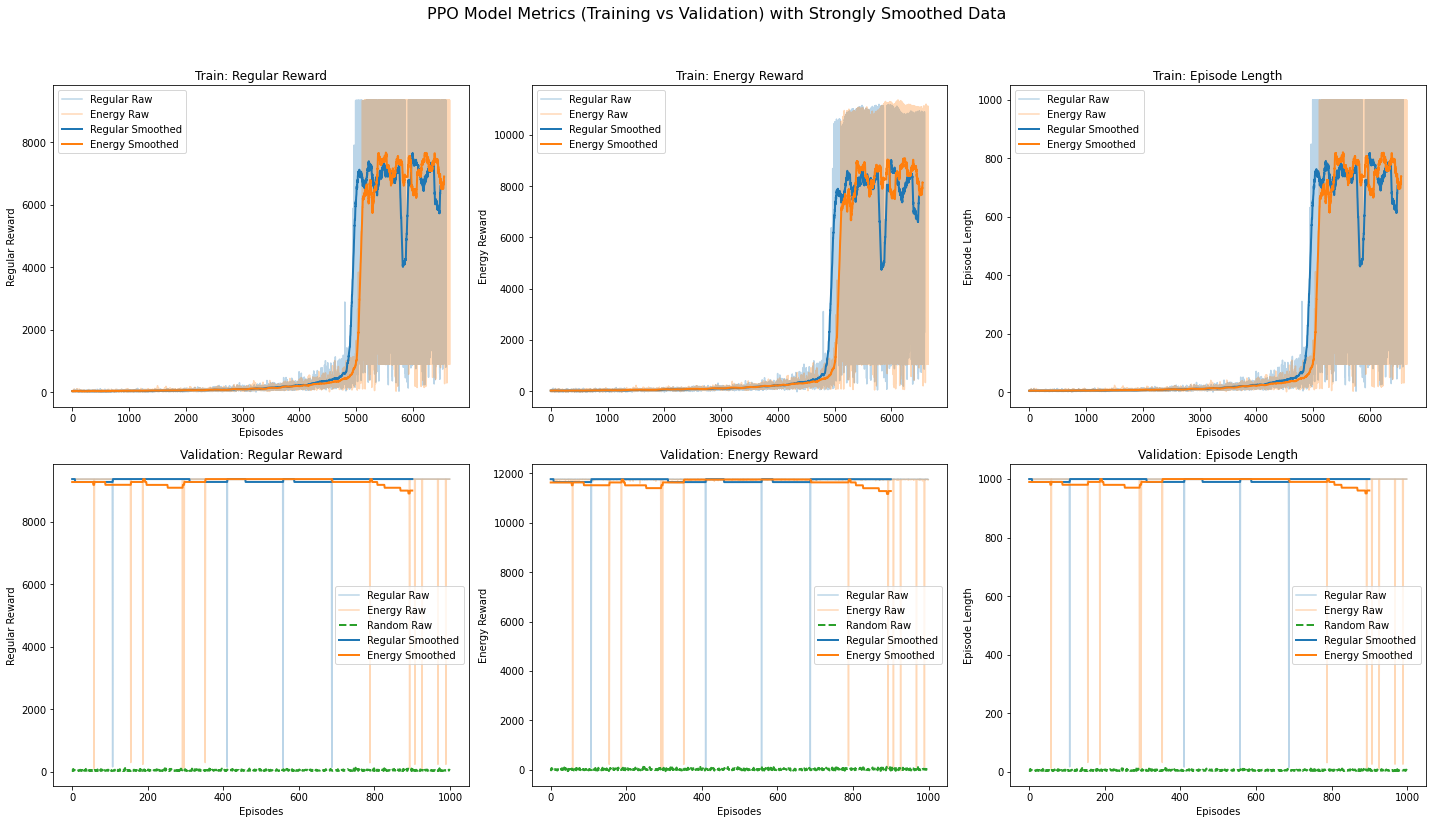

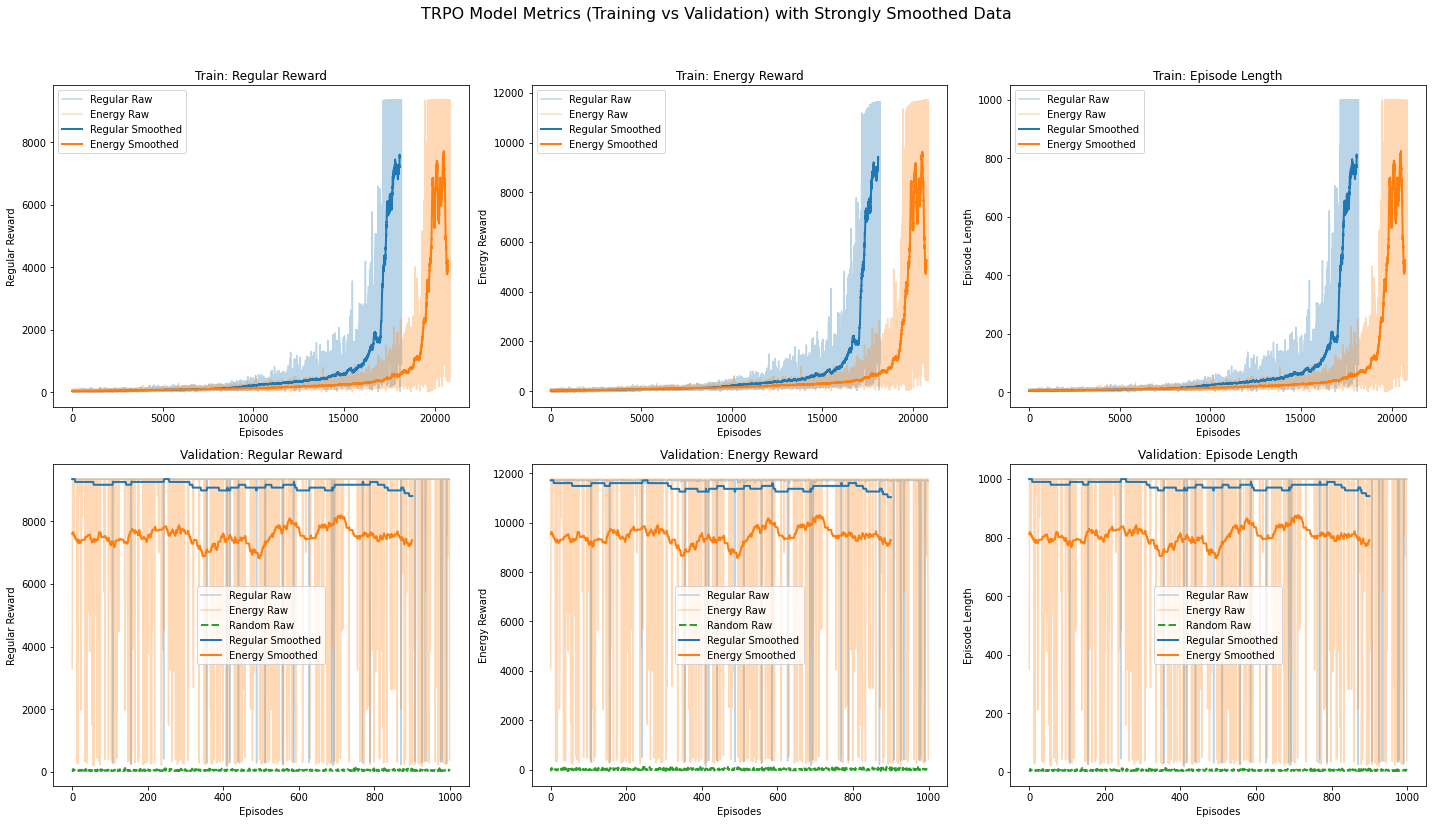

In [ ]:
smooth_window = 100

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('PPO Model Metrics (Training vs Validation) with Strongly Smoothed Data', fontsize=16)

# PPO Training
for i, metric in enumerate(metrics):
    ax = axes[0, i]
    ax.plot(dataframes['ppo_train_regular'][metric], color=colors['regular'], alpha=0.3, label='Regular Raw')
    ax.plot(dataframes['ppo_train_energy'][metric], color=colors['energy'], alpha=0.3, label='Energy Raw')
    
    ax.plot(smooth(dataframes['ppo_train_regular'][metric], smooth_window), color=colors['regular'], linewidth=2, label='Regular Smoothed')
    ax.plot(smooth(dataframes['ppo_train_energy'][metric], smooth_window), color=colors['energy'], linewidth=2, label='Energy Smoothed')
    
    ax.set_title(f'Train: {titles[i]}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel(titles[i])
    ax.legend()

# PPO Validation with random
for i, metric in enumerate(metrics):
    ax = axes[1, i]
    ax.plot(dataframes['ppo_eval_regular'][metric], color=colors['regular'], alpha=0.3, label='Regular Raw')
    ax.plot(dataframes['ppo_eval_energy'][metric], color=colors['energy'], alpha=0.3, label='Energy Raw')
    ax.plot(dataframes['random'][metric], color=colors['random'], linewidth=2, linestyle='--', label='Random Raw')
    
    ax.plot(smooth(dataframes['ppo_eval_regular'][metric], smooth_window), color=colors['regular'], linewidth=2, label='Regular Smoothed')
    ax.plot(smooth(dataframes['ppo_eval_energy'][metric], smooth_window), color=colors['energy'], linewidth=2, label='Energy Smoothed')
    
    ax.set_title(f'Validation: {titles[i]}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel(titles[i])
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('ppo_metrics.png', dpi=300)
plt.show()

# TRPO Plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('TRPO Model Metrics (Training vs Validation) with Strongly Smoothed Data', fontsize=16)

# TRPO Training
for i, metric in enumerate(metrics):
    ax = axes[0, i]
    ax.plot(dataframes['trpo_train_regular'][metric], color=colors['regular'], alpha=0.3, label='Regular Raw')
    ax.plot(dataframes['trpo_train_energy'][metric], color=colors['energy'], alpha=0.3, label='Energy Raw')
    
    ax.plot(smooth(dataframes['trpo_train_regular'][metric], smooth_window), color=colors['regular'], linewidth=2, label='Regular Smoothed')
    ax.plot(smooth(dataframes['trpo_train_energy'][metric], smooth_window), color=colors['energy'], linewidth=2, label='Energy Smoothed')
    
    ax.set_title(f'Train: {titles[i]}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel(titles[i])
    ax.legend()

# TRPO Validation with random
for i, metric in enumerate(metrics):
    ax = axes[1, i]
    ax.plot(dataframes['trpo_eval_regular'][metric], color=colors['regular'], alpha=0.3, label='Regular Raw')
    ax.plot(dataframes['trpo_eval_energy'][metric], color=colors['energy'], alpha=0.3, label='Energy Raw')
    ax.plot(dataframes['random'][metric], color=colors['random'], linewidth=2, linestyle='--', label='Random Raw')
    
    ax.plot(smooth(dataframes['trpo_eval_regular'][metric], smooth_window), color=colors['regular'], linewidth=2, label='Regular Smoothed')
    ax.plot(smooth(dataframes['trpo_eval_energy'][metric], smooth_window), color=colors['energy'], linewidth=2, label='Energy Smoothed')
    
    ax.set_title(f'Validation: {titles[i]}')
    ax.set_xlabel('Episodes')
    ax.set_ylabel(titles[i])
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('trpo_metrics.png', dpi=300)
plt.show()